# Title: Assignment 6
### Name: Sharmin Akhter
### ID: 201891112
### Date 31-03-2023
### Master of Data Science

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

# Question 1

The radar plot below shows the average fuel efficiency (in units of L / 100 km) for Toyota Corolla vehicles for each month of the year. There is greater fuel efficiency in Summer ( 8 L / 100 km) and worse fuel efficiency in Winter ( 10 L / 100 km), representing roughly a 25% decrease in fuel efficiency.

Re-create the above radar plot using Plotly and the fuel-efficiency.csv data set. The radar plot uses a smooth curve to join the points, called a spline (hint: line_shape). Make sure the ordering of the days of the week match the figure above.

In [262]:
df = pd.read_csv("fuel-efficiency.csv")
df

,month,efficiency
0,1,10.420545
1,2,10.691178
2,3,10.593444
3,4,9.467789
4,5,8.367721
5,6,8.582881
6,7,6.760700
7,8,7.709470
8,9,8.724014
9,10,8.892976


In [263]:
# Create month names
month_names = ["January", "February", "March", "April",
               "May", "June", "July", "August", "September", "October", "November", "December"]

# Append January data to close the trace line
month_names.append(month_names[0])
efficiencies = df["efficiency"].tolist()
efficiencies.append(efficiencies[0])

# Create the Radar Plot
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r = efficiencies,
    theta = month_names,
    mode = "lines",
    name = "Fuel Efficiency",
    line_shape = "spline",
))

fig.update_layout(
    polar = dict(
        radialaxis = dict(
            visible = True,
            tickvals = [0,2,4,6,8,10,12],
            range = [0,12]),
        angularaxis = dict(
            direction = "clockwise",
            rotation = 90
)))
fig.show()

# Question 2

The choropleth map below shows the percentage of each province’s population that are university or college students. Plotting relative data works well for spatial data, as plotting the absolute number of students would just highlight the most populous provinces. Instead, we can see that the proportion of students has only modest variations throughout Canada.

Re-create the above choropleth map using GeoPandas and the students.csv data set. The map of Canada is given in the canada.shp file and associated files. The colour map uses the “Reds” colour map from ColorBrewer. Make sure to highlight the borders of each province and territory, and to include the title.

In [264]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [265]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [266]:
df1 = pd.read_csv("students.csv")
df1

,Province,Total students,Population
0,Alberta,200382.0,4262635
1,British Columbia,295488.0,5000879
2,Manitoba,63183.0,1342153
3,New Brunswick,26733.0,775610
4,Newfoundland and Labrador,24777.0,510550
5,Nova Scotia,54501.0,969383
6,Ontario,889287.0,14223942
7,Prince Edward Island,7428.0,154331
8,Quebec,530340.0,8501833
9,Saskatchewan,59157.0,1132505


In [267]:
# Calculate the percentage of each province's population that are university or college students
df1['Student_Percentage'] = (df1['Total students'] / df1['Population']) * 100

In [268]:
# Read the shapefile
canada_gdf = gpd.read_file("canada.shp")
canada_gdf

,Province,geometry
0,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83095..."
1,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84274..."
2,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84748..."
3,New Brunswick,"MULTIPOLYGON (((8176224.537 1722553.460, 81786..."
4,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84007..."
5,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63918..."
6,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60385..."
7,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5452957.477..."
8,Alberta,"POLYGON ((5228304.177 2767597.891, 4890689.760..."
9,British Columbia,"MULTIPOLYGON (((4018904.414 3410247.271, 41867..."


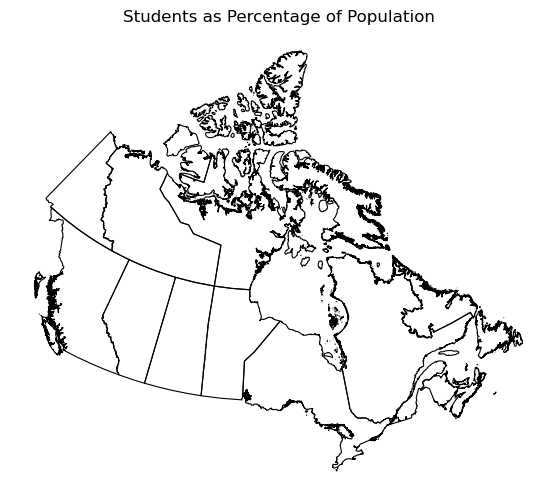

In [269]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
canada_gdf.boundary.plot(ax = ax, linewidth = 0.8, edgecolor = 'black')
ax.set_title('Students as Percentage of Population')
ax.set_axis_off()
ax.set_aspect('equal')
plt.show()

In [270]:
# Merge the DataFrames
merged_gdf = canada_gdf.merge(df1, on = 'Province', how='outer')
merged_gdf

,Province,geometry,Total students,Population,Student_Percentage
0,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83095...",24777.0,510550.0,4.853002
1,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84274...",7428.0,154331.0,4.813032
2,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84748...",54501.0,969383.0,5.622236
3,New Brunswick,"MULTIPOLYGON (((8176224.537 1722553.460, 81786...",26733.0,775610.0,3.446706
4,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84007...",530340.0,8501833.0,6.237949
5,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63918...",889287.0,14223942.0,6.252043
6,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60385...",63183.0,1342153.0,4.707585
7,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5452957.477...",59157.0,1132505.0,5.223553
8,Alberta,"POLYGON ((5228304.177 2767597.891, 4890689.760...",200382.0,4262635.0,4.700895
9,British Columbia,"MULTIPOLYGON (((4018904.414 3410247.271, 41867...",295488.0,5000879.0,5.908721


In [271]:
merged_gdf['Student_Percentage'].fillna(0, inplace=True)
merged_gdf

,Province,geometry,Total students,Population,Student_Percentage
0,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83095...",24777.0,510550.0,4.853002
1,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84274...",7428.0,154331.0,4.813032
2,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84748...",54501.0,969383.0,5.622236
3,New Brunswick,"MULTIPOLYGON (((8176224.537 1722553.460, 81786...",26733.0,775610.0,3.446706
4,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84007...",530340.0,8501833.0,6.237949
5,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63918...",889287.0,14223942.0,6.252043
6,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60385...",63183.0,1342153.0,4.707585
7,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5452957.477...",59157.0,1132505.0,5.223553
8,Alberta,"POLYGON ((5228304.177 2767597.891, 4890689.760...",200382.0,4262635.0,4.700895
9,British Columbia,"MULTIPOLYGON (((4018904.414 3410247.271, 41867...",295488.0,5000879.0,5.908721


In [272]:
print(canada_gdf['Province'])


0     Newfoundland and Labrador
1          Prince Edward Island
2                   Nova Scotia
3                 New Brunswick
4                        Quebec
5                       Ontario
6                      Manitoba
7                  Saskatchewan
8                       Alberta
9              British Columbia
10                        Yukon
11        Northwest Territories
12                      Nunavut
Name: Province, dtype: object


In [273]:
print(df1['Province'])

0                       Alberta
1              British Columbia
2                      Manitoba
3                 New Brunswick
4     Newfoundland and Labrador
5                   Nova Scotia
6                       Ontario
7          Prince Edward Island
8                        Quebec
9                  Saskatchewan
10                  Territories
Name: Province, dtype: object


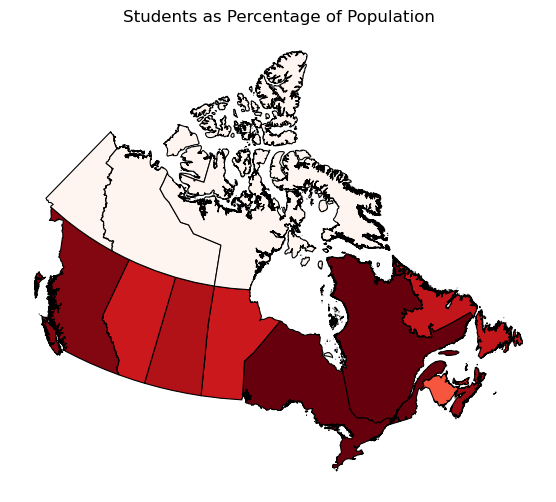

In [274]:
# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
merged_gdf.plot(column = 'Student_Percentage', cmap = 'Reds', 
                linewidth = 0.8, edgecolor = 'black', legend = False, ax = ax)
ax.set_title('Students as Percentage of Population')
ax.set_axis_off()
ax.set_aspect('equal')

plt.show()


# Question 3:

The map below shows the location of a number of universities throughout Canada. Each university is represented by a point, and the size of each point corresponds to the number of students enrolled at that university. Inset into the map is a close-up view of Southern Ontario, where there is a high density of universities.

Using the universities.geojson data set and map of Canada shapefiles, re-create the above visualization with GeoPandas. The universities data set uses the world geodetic system (EPSG:4326) as its coordinate reference system, which is based on latitude and longitude. The Canada shapefiles use the North American Datum geodetic system with Lambert conformal conic projection (EPSG:3347). Its units are in metres. You will need to reconcile the differences between these coordinate reference systems.

Make sure to include the inset with a zoom-in view of Southern Ontario. It contains the 6 universities of The University of Toronto, the University of Waterloo, the University of Guelph, McMaster University, Queen’s University, and the University of Western Ontario. The point size for each university should be scaled to the total number of students. The background colour of Canada is a pale yellow (#FFFFE5) and the universities are red (#A50F15). Make sure to highlight the borders of each province and territory. Include the titles for the visualization and Ontario zoom-in.

# Load the Data

In [275]:
# !brew install proj geos

In [276]:
# !pip install cartopy

In [277]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# import cartopy.crs as ccrs

In [278]:
# Read the universities GeoJSON file
universities_gdf = gpd.read_file("universities.geojson")
universities_gdf

,Institution,City,Province,Total students,Established,Sponsored research income,Latitude,Longitude,geometry
0,University of Toronto,Toronto,Ontario,97400,1827,1111035000,43.741667,-79.373333,POINT (-79.37333 43.74167)
1,University of British Columbia,Vancouver,British Columbia,70340,1908,618024000,49.261111,-123.113889,POINT (-123.11389 49.26111)
2,University of Ottawa,Ottawa,Ontario,48800,1848,314609000,45.424722,-75.695000,POINT (-75.69500 45.42472)
3,Université Laval,Quebec City,Quebec,47690,1663,403841000,46.813889,-71.208056,POINT (-71.20806 46.81389)
4,Université de Montréal,Montreal,Quebec,45800,1878,567065000,45.508889,-73.554167,POINT (-73.55417 45.50889)
5,University of Alberta,Edmonton,Alberta,43490,1908,493824000,53.534444,-113.490278,POINT (-113.49028 53.53444)
6,University of Western Ontario,London,Ontario,43190,1878,260740000,42.967500,-81.232500,POINT (-81.23250 42.96750)
7,University of Waterloo,Waterloo,Ontario,42200,1956,212649000,43.466667,-80.516667,POINT (-80.51667 43.46667)
8,McMaster University,Hamilton,Ontario,37330,1887,391573000,43.256667,-79.869167,POINT (-79.86917 43.25667)
9,University of Calgary,Calgary,Alberta,36330,1966,421761000,51.050000,-114.066667,POINT (-114.06667 51.05000)


In [279]:
universities_gdf.isnull().sum()

Institution                  0
City                         0
Province                     0
Total students               0
Established                  0
Sponsored research income    0
Latitude                     0
Longitude                    0
geometry                     0
dtype: int64

In [280]:

# Convert the universities GeoDataFrame to EPSG:3347
universities_gdf1 = universities_gdf.to_crs(epsg=3347)

# Convert the Canada GeoDataFrame to EPSG:3347
canada_gdf1 = canada_gdf.to_crs(epsg=3347)

#universities_gdf = universities_gdf.to_crs(epsg=3347)

In [281]:
universities_gdf1

,Institution,City,Province,Total students,Established,Sponsored research income,Latitude,Longitude,geometry
0,University of Toronto,Toronto,Ontario,97400,1827,1111035000,43.741667,-79.373333,POINT (7223652.871 938729.334)
1,University of British Columbia,Vancouver,British Columbia,70340,1908,618024000,49.261111,-123.113889,POINT (4018139.391 2004988.791)
2,University of Ottawa,Ottawa,Ontario,48800,1848,314609000,45.424722,-75.695000,POINT (7471319.555 1191039.904)
3,Université Laval,Quebec City,Quebec,47690,1663,403841000,46.813889,-71.208056,POINT (7763100.367 1440936.052)
4,Université de Montréal,Montreal,Quebec,45800,1878,567065000,45.508889,-73.554167,POINT (7632529.305 1245697.899)
5,University of Alberta,Edmonton,Alberta,43490,1908,493824000,53.534444,-113.490278,POINT (4814940.032 2167169.341)
6,University of Western Ontario,London,Ontario,43190,1878,260740000,42.967500,-81.232500,POINT (7087549.999 824015.562)
7,University of Waterloo,Waterloo,Ontario,42200,1956,212649000,43.466667,-80.516667,POINT (7136575.929 890357.389)
8,McMaster University,Hamilton,Ontario,37330,1887,391573000,43.256667,-79.869167,POINT (7193875.555 876654.071)
9,University of Calgary,Calgary,Alberta,36330,1966,421761000,51.050000,-114.066667,POINT (4686047.866 1923058.299)


In [282]:
canada_gdf1

,Province,geometry
0,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83095..."
1,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84274..."
2,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84748..."
3,New Brunswick,"MULTIPOLYGON (((8176224.537 1722553.460, 81786..."
4,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84007..."
5,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63918..."
6,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60385..."
7,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5452957.477..."
8,Alberta,"POLYGON ((5228304.177 2767597.891, 4890689.760..."
9,British Columbia,"MULTIPOLYGON (((4018904.414 3410247.271, 41867..."


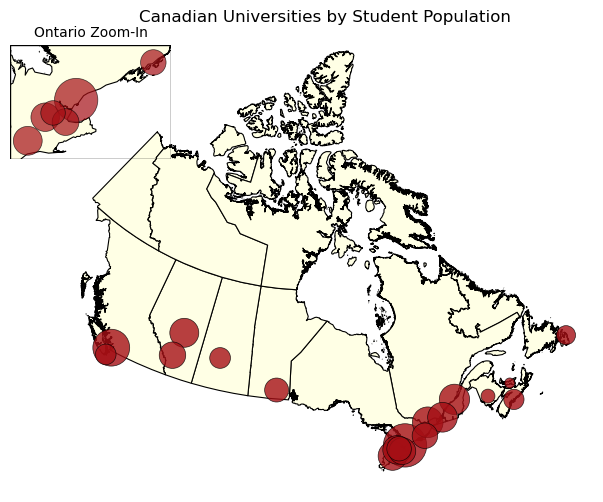

In [283]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from shapely.geometry import box

# Filter the universities GeoDataFrame to include only the universities of interest
universities_of_interest = ['University of Toronto', 
                            'University of Waterloo', 'University of Guelph',
                            'McMaster University', "Queen's University", 'University of Western Ontario']
filtered_universities_gdf = universities_gdf1[universities_gdf1['Institution'].isin(universities_of_interest)]

# Calculate the bounding box for the universities of interest
minx, miny, maxx, maxy = filtered_universities_gdf.total_bounds
buffer = 50000  # Add a buffer to the bounding box
x1, x2, y1, y2 = minx - buffer, maxx + buffer, miny - buffer, maxy + buffer

# Plot the base map of Canada
fig, ax = plt.subplots(figsize=(10, 6))
canada_gdf1.plot(ax=ax, edgecolor='black', facecolor='#FFFFE5', linewidth=0.8)

# Plot the universities on the base map
universities_gdf1.plot(ax=ax, 
                       markersize=universities_gdf1['Total students']/100, 
                       color='#A50F15', edgecolor='black', linewidth=0.5, alpha=0.8)
ax.set_title('Canadian Universities by Student Population')

# Create an inset map focusing on Southern Ontario
axins = inset_axes(ax, width="30%", height="30%",bbox_to_anchor=(-0.1, 0.01, 1, 1), bbox_transform=ax.transAxes,loc='upper left')
canada_gdf1.plot(ax=axins, edgecolor='black', facecolor='#FFFFE5', linewidth=0.8)
filtered_universities_gdf.plot(ax=axins, 
                               markersize=filtered_universities_gdf['Total students'] / 100, 
                               color='#A50F15', edgecolor='black', linewidth=0.5, alpha=0.7)

# Set the extent of the inset map
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_axis_off()

# Add a title to the inset map
axins.set_title('Ontario Zoom-In', fontsize=10)

rect = Rectangle((0, 0), 1, 1, transform=axins.transAxes, 
                 zorder=1000, facecolor='none', edgecolor='black', linewidth=1)

axins.add_artist(rect)
ax.set_axis_off()
plt.show()
